## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/cleaned/train_V2_cleaned.csv")
df.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,gender_M,gender_V,combined_pos_score,combined_neg_score
0,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,1672.78,1,829.66,1,0,0.00000,7.955259
1,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,1001.40,0,0.00,1,0,0.33433,1.842549
2,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1785.59,0,0.00,0,1,0.00000,0.889793
3,227.0,0.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.151873,0.0,0.0,1127.05,0,0.00,0,1,0.00000,0.000000
4,229.0,810.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,1640.31,0,0.00,1,0,0.00000,6.894609


## Preparing data for model training

In [3]:
# turns continous variables into numbers
df = df.astype(int)

In [4]:
X = df.drop(columns=["outcome_profit", 'outcome_damage_inc', 'outcome_damage_amount'], axis=1)
y = df["outcome_damage_amount"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Training different models to find the best one

### 1. Linear regression

In [6]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

# metric
mse_lin = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_lin = mean_absolute_error(y_test, Y_pred)
r2_lin = r2_score(y_test, Y_pred)

# print metrics
print(mae_lin, mse_lin, r2_lin)

208.39994055674583 290.1628994621201 0.0672617528032986


### 2. Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

# metric
mse_log = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_log = mean_absolute_error(y_test, Y_pred)
r2_log = r2_score(y_test, Y_pred)

# print metrics
print(mae_log, mse_log, r2_log)

159.46666666666667 340.2970939065042 -0.2828991030377741


### 3. Ridge

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
Y_pred = ridge.predict(X_test)

# metric
mse_ridge = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_ridge = mean_absolute_error(y_test, Y_pred)
r2_ridge = r2_score(y_test, Y_pred)

# print metrics
print(mae_ridge, mse_ridge, r2_ridge)

208.39596656578254 290.159306953731 0.06728484913463872


### 4. Lasso

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
Y_pred = lasso.predict(X_test)

# metric
mse_lasso = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_lasso = mean_absolute_error(y_test, Y_pred)
r2_lasso = r2_score(y_test, Y_pred)

# print metrics
print(mae_lasso, mse_lasso, r2_lasso)

208.452884708307 290.0393114569533 0.06805613906112862


### 5. ElasticNet

In [10]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(l1_ratio=0.5)
elasticnet.fit(X_train, y_train)
Y_pred = elasticnet.predict(X_test)

# metric
mse_elasticnet = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_elasticnet = mean_absolute_error(y_test, Y_pred)
r2_elasticnet = r2_score(y_test, Y_pred)

# print metrics
print(mae_elasticnet, mse_elasticnet, r2_elasticnet)

209.4409241116727 290.85192962645164 0.06282667265395614


### 6. SVR

In [11]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
Y_pred = svr.predict(X_test)

# metric
mse_svr = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_svr = mean_absolute_error(y_test, Y_pred)
r2_svr = r2_score(y_test, Y_pred)

# print metrics
print(mae_svr, mse_svr, r2_svr)

155.04969562637342 338.0236272303816 -0.26581470435176024


### 7. DecisionTreeRegressor

In [12]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, y_train)
Y_pred = dtreg.predict(X_test)

# metric
mse_dtreg = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_dtreg = mean_absolute_error(y_test, Y_pred)
r2_dtreg = r2_score(y_test, Y_pred)

# print metrics
print(mae_dtreg, mse_dtreg, r2_dtreg)

233.21060606060607 406.77991778743393 -0.8331374475392834


### 8. RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
Y_pred = rfreg.predict(X_test)

# metric
mse_rfreg = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_rfreg = mean_absolute_error(y_test, Y_pred)
r2_rfreg = r2_score(y_test, Y_pred)

# print metrics
print(mae_rfreg, mse_rfreg, r2_rfreg)

218.0792878787879 297.7810679583139 0.017641093135050467


### 9. Gradient Boosting Regression

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor()

gbreg.fit(X_train, y_train)
Y_pred = gbreg.predict(X_test)

# metric
mse_gbreg = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_gbreg = mean_absolute_error(y_test, Y_pred)
r2_gbreg = r2_score(y_test, Y_pred)

# print metrics
print(mae_gbreg, mse_gbreg, r2_gbreg)

208.83866658766453 293.199884715782 0.047634594568448096


### 10. KneighborsRegressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

# metric
mse_knn = np.sqrt(mean_squared_error(y_test, Y_pred))
mae_knn = mean_absolute_error(y_test, Y_pred)
r2_knn = r2_score(y_test, Y_pred)

# print metrics
print(mae_knn, mse_knn, r2_knn)

217.2775757575758 319.9919959226253 -0.1343687436771437


## Model comparison

In [16]:
all_MSEs = [mse_lin, mse_log, mse_ridge, mse_lasso, mse_elasticnet, mse_svr, mse_dtreg, mse_rfreg, mse_gbreg, mse_knn]
all_MAEs = [mae_lin, mae_log, mae_ridge, mae_lasso, mae_elasticnet, mae_svr, mae_dtreg, mae_rfreg, mae_gbreg, mae_knn]
all_R2s  = [ r2_lin,  r2_log,  r2_ridge,  r2_lasso,  r2_elasticnet,  r2_svr,  r2_dtreg,  r2_rfreg,  r2_gbreg, r2_knn]

In [19]:
models = pd.DataFrame({'Model': ['LinearRegression',
                                'LogisticRegression',
                                'Ridge',
                                'Lasso', 
                                'ElasticNet',
                                'SVR',
                                'DecisionTreeRegressor',
                                'RandomForestRegressor', 
                                'GradientBoostingRegressor',
                                'KNeighborsRegressor'
                                ],

                        'Root MSE': all_MSEs,
                        'MAE': all_MAEs,
                        'R2 Score': all_R2s,
                        })

# New feature to compare models
FE = "Root MSE + MAE"
models[FE] = ((models["Root MSE"] + models["MAE"]))                     

models.sort_values(by = FE, ascending = True, ignore_index = True)

,Model,Root MSE,MAE,R2 Score,Root MSE + MAE
0,SVR,338.023627,155.049696,-0.265815,493.073323
1,Lasso,290.039311,208.452885,0.068056,498.492196
2,Ridge,290.159307,208.395967,0.067285,498.555274
3,LinearRegression,290.162899,208.399941,0.067262,498.562840
4,LogisticRegression,340.297094,159.466667,-0.282899,499.763761
5,ElasticNet,290.851930,209.440924,0.062827,500.292854
6,GradientBoostingRegressor,293.199885,208.838667,0.047635,502.038551
7,RandomForestRegressor,297.781068,218.079288,0.017641,515.860356
8,KNeighborsRegressor,319.991996,217.277576,-0.134369,537.269572
9,DecisionTreeRegressor,406.779918,233.210606,-0.833137,639.990524


### Visual comparison

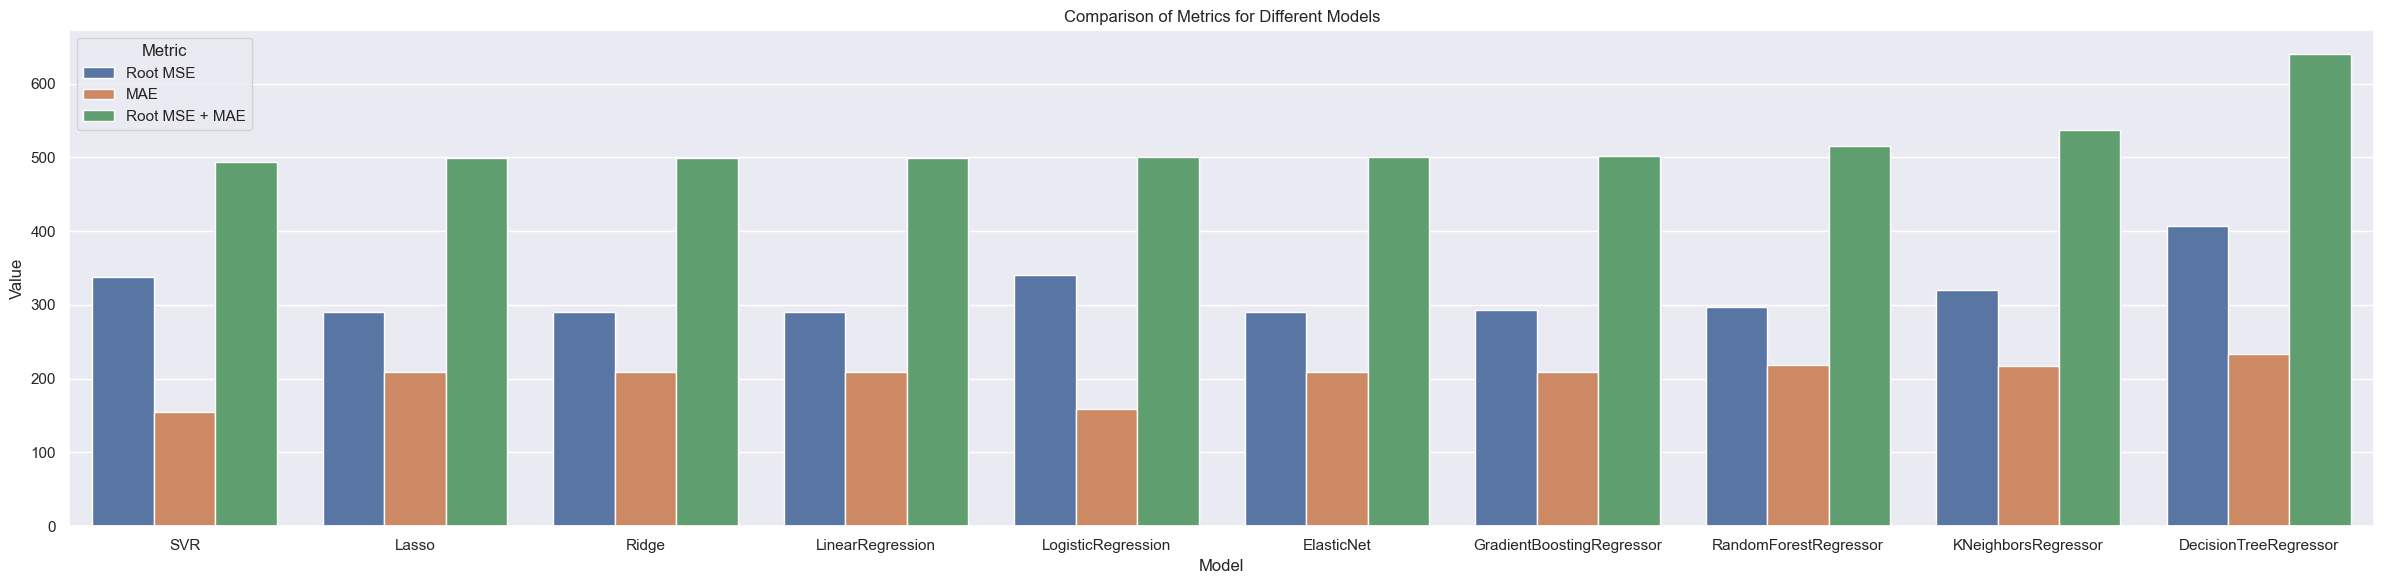

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Filter DataFrame to include only desired metrics
desired_metrics = ['Root MSE', 'MAE', FE]
models_filtered = models[['Model'] + desired_metrics]
models_filtered = models_filtered.sort_values(by = FE)

# Reformat the DataFrame
models_melted = pd.melt(models_filtered, id_vars='Model', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(24, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=models_melted)
plt.title('Comparison of Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

### My choice

I choose to proceed with `Lasso` and `Ridge` because they have amongst the lowest errors (`SVR` has a high **Root MSE** negative **R2-score** so I am wary of using it)